In [1]:
#importing necessary libraries:
# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#for machine learning:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from time import time
from sklearn.metrics import fbeta_score
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler 

#External Libs 
from tabulate import tabulate

In [2]:
#Read the file 
df = pd.read_csv('adult.data')

# add the collums name for each attributes
df.columns = ['age', 'workclass', 'fnlwgt', 
              'education', 'education_num',
              'marital_status', 'occupation', 
              'relationship','race', 'sex', 
              'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'income']

In [3]:
#display the first few raw data
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#Display the info of each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
"""

    We can decide from here that we have eight categorical and six continuous attributes.

"""

'\n\n    We can decide from here that we have eight categorical and six continuous attributes.\n\n'

In [6]:
"""

    Get all the count of the nan values for each attributes
    Found that there is no nan values in the data set
    
"""

print("Nan in each columns:" , df.isna().sum(), sep='\n')

Nan in each columns:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


<AxesSubplot:xlabel='count', ylabel='workclass'>

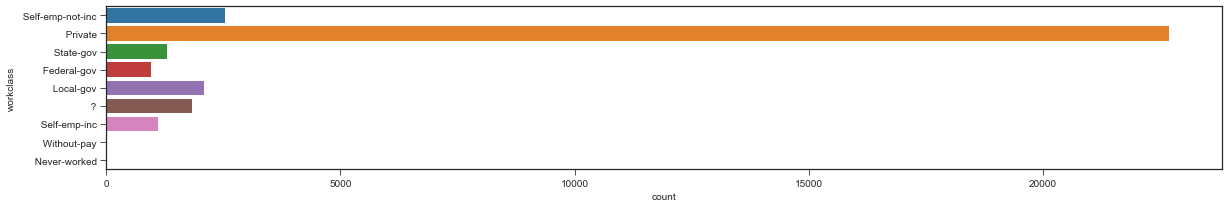

In [7]:
#Count of each workclass
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="workclass", data=df)

<AxesSubplot:xlabel='count', ylabel='education'>

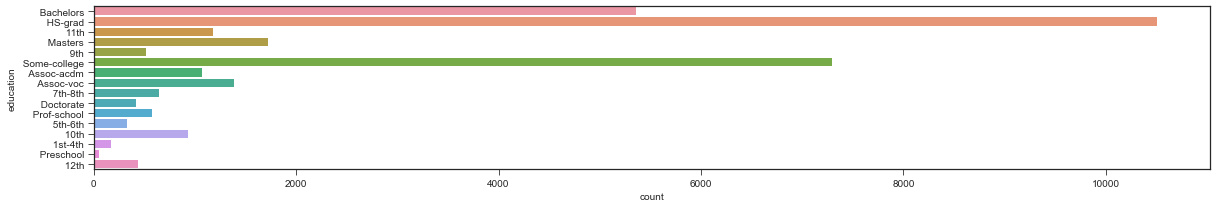

In [8]:
#Count of education
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=df)

<AxesSubplot:xlabel='count', ylabel='education_num'>

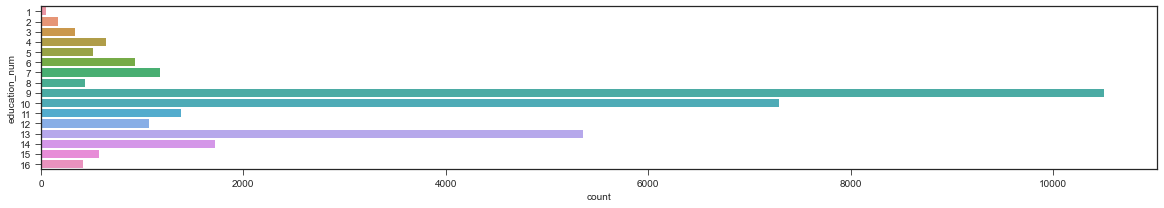

In [9]:
#Count of education num
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education_num", data=df)

<AxesSubplot:xlabel='count', ylabel='occupation'>

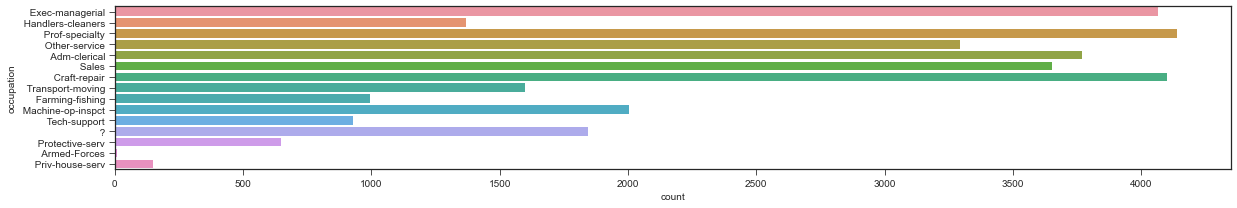

In [10]:
#Count of occupation
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="occupation", data=df)

<AxesSubplot:xlabel='count', ylabel='relationship'>

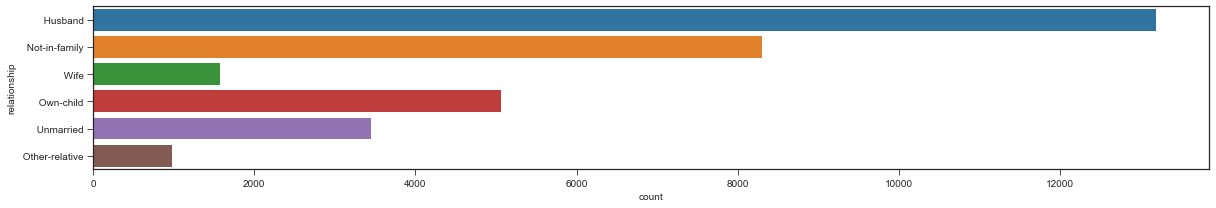

In [11]:
#Count of relationship
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="relationship", data=df)

<AxesSubplot:xlabel='count', ylabel='marital_status'>

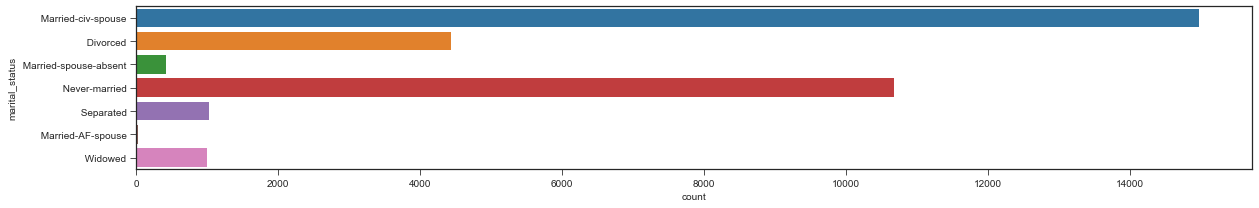

In [12]:
#Count of marital_status
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=df)

<AxesSubplot:xlabel='count', ylabel='race'>

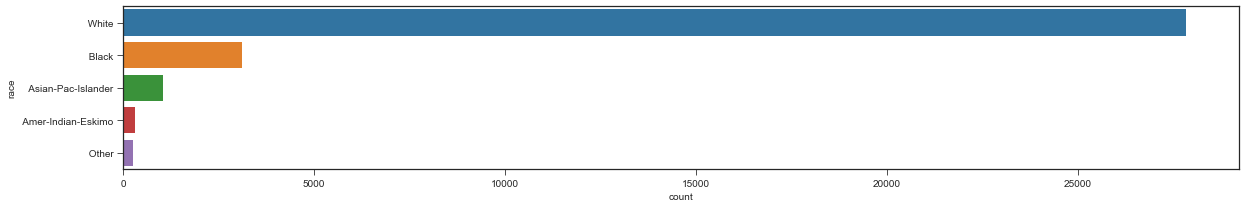

In [13]:
#Count of race
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="race", data=df)

<AxesSubplot:xlabel='count', ylabel='sex'>

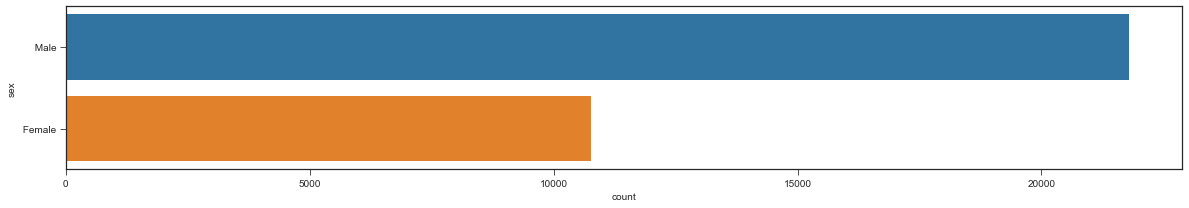

In [14]:
#Count of sex
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="sex", data=df)

<AxesSubplot:xlabel='count', ylabel='native_country'>

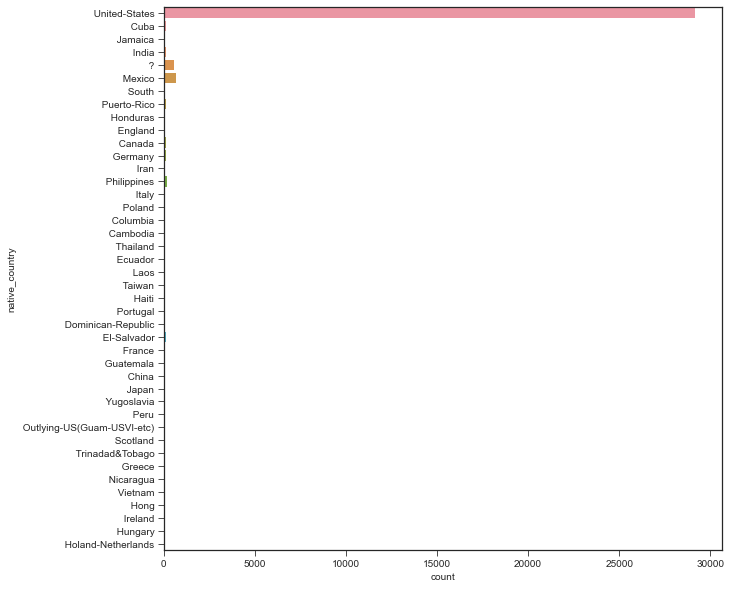

In [15]:
#Count of native_country
fig = plt.figure(figsize=(10,10))
plt.style.use('seaborn-ticks')
sns.countplot(y="native_country", data=df)

<AxesSubplot:xlabel='count', ylabel='income'>

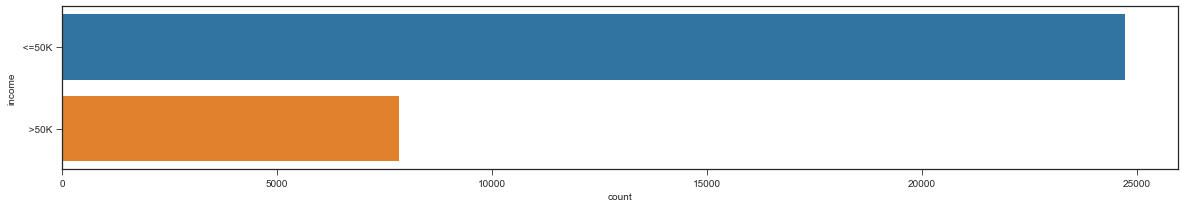

In [16]:
#Count of >50K & <=50K
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=df)

,income,Percentage
0,<=50K,0.759183
1,>50K,0.240817


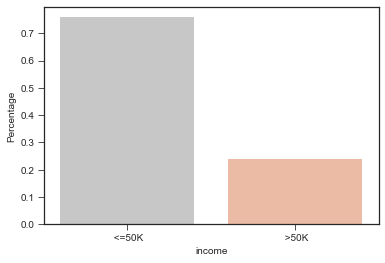

In [17]:
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='RdGy_r')
eda_percentage

In [18]:
"""
Observation: 
    1. From the above visualization noticied that the workclass, occupation and native_country
    has some "?" So those values are replaced with the approach of "Mode"
    2. The number of incomes "<=50K" is around 76% and ">50K" is around 24%. So, 
    the class distribution is moderately imbalanced.  
    
"""
df[df == '?'] = np.nan
for col in ['workclass', 'occupation', 'native_country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.249841
0,<=50K,36.783648


In [20]:
#Average 45 years people are getting “>50K” and 37 years people are getting “<= 50K” 

In [21]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if(x <= 18 ):
        return "Less than 18"    
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

/Users/achsum/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


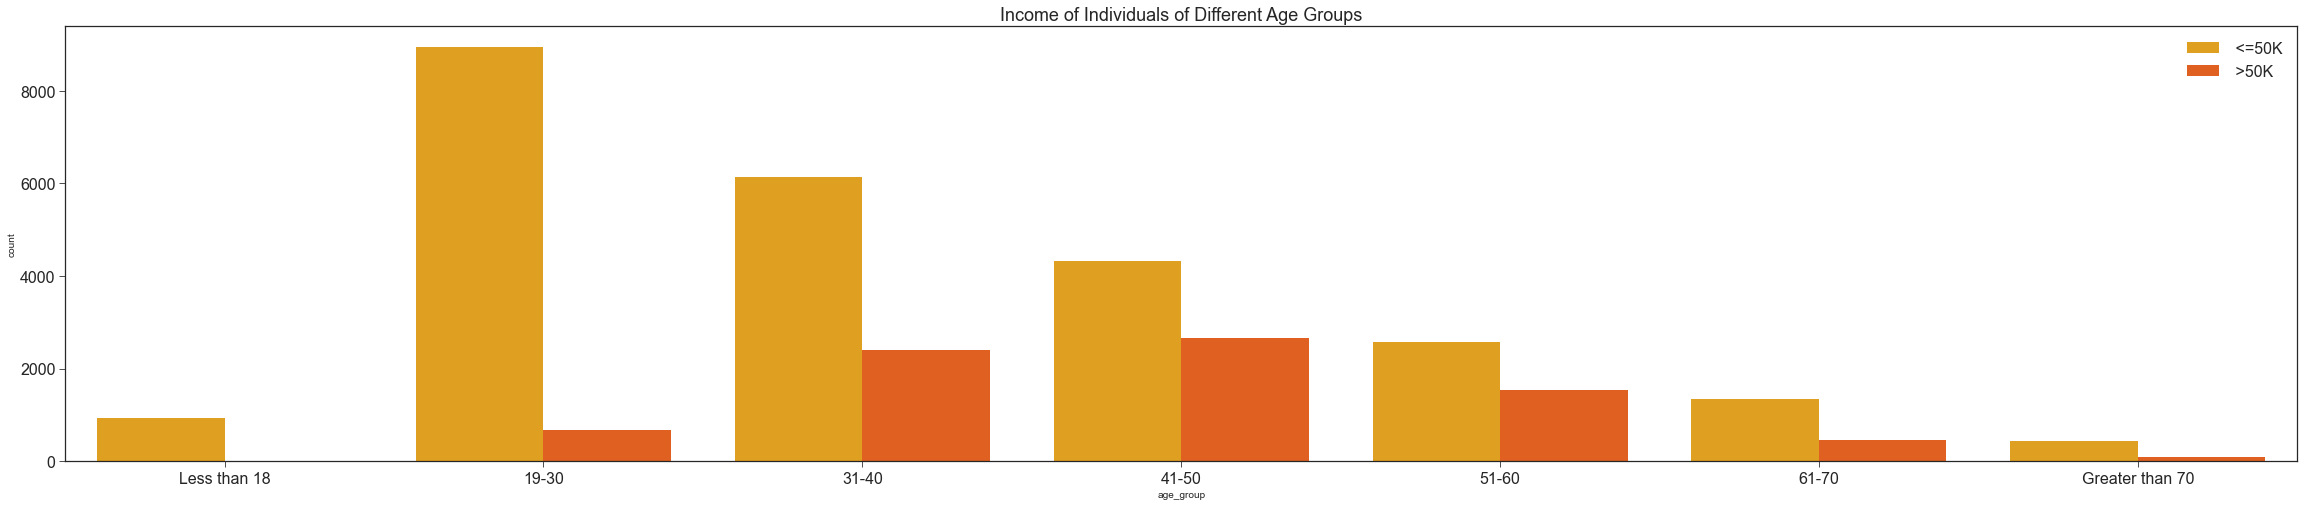

In [22]:
plt.figure(figsize=(40,8))
order_list = ['Less than 18','19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['age_group'], hue = df['income'], palette='autumn_r', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [23]:
#There is a gradual decrease in the number of people earning “<50K” respect to their age. 

/Users/achsum/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


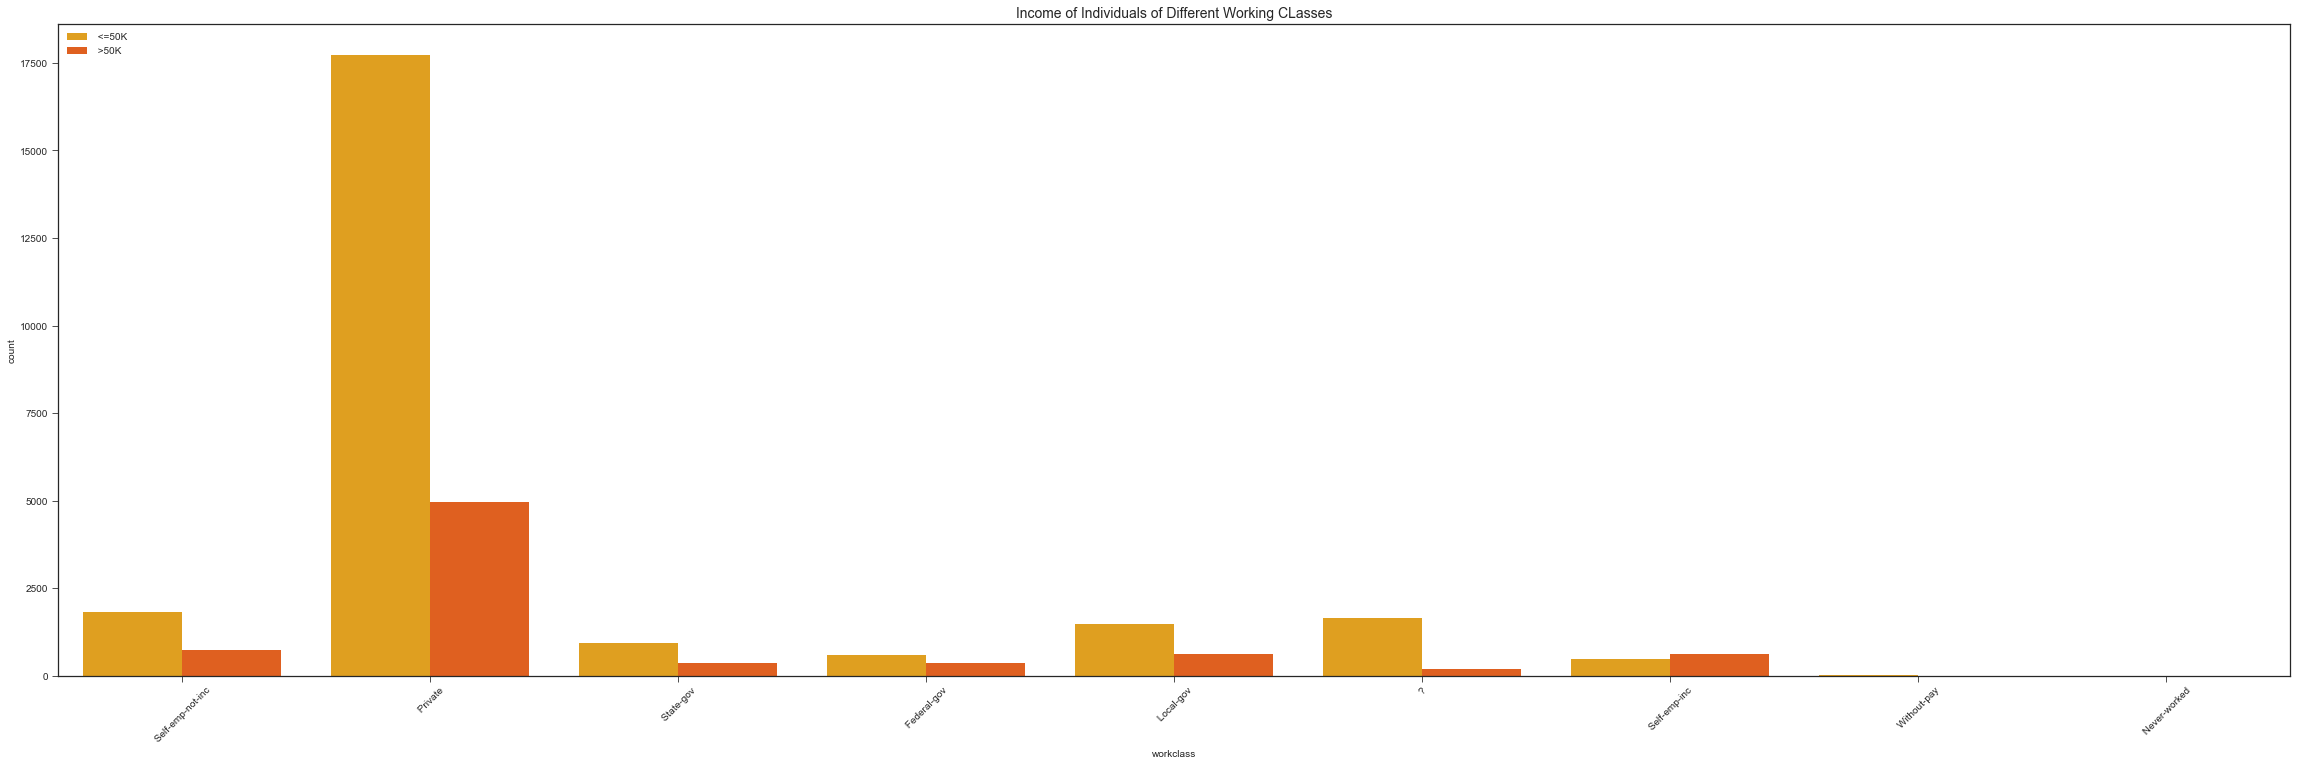

In [24]:
plt.figure(figsize=(40,12))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['workclass'], hue = df['income'],  palette='autumn_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=14)
plt.xticks(fontsize=10,rotation = 45)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

In [25]:
"""

    There is a significant income difference between people who are working in the 'Private'. 
    Through the graph, we can see most of the people are from the 'Private' sector.
    
"""
df = df.drop(columns=['age_group'])

/Users/achsum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


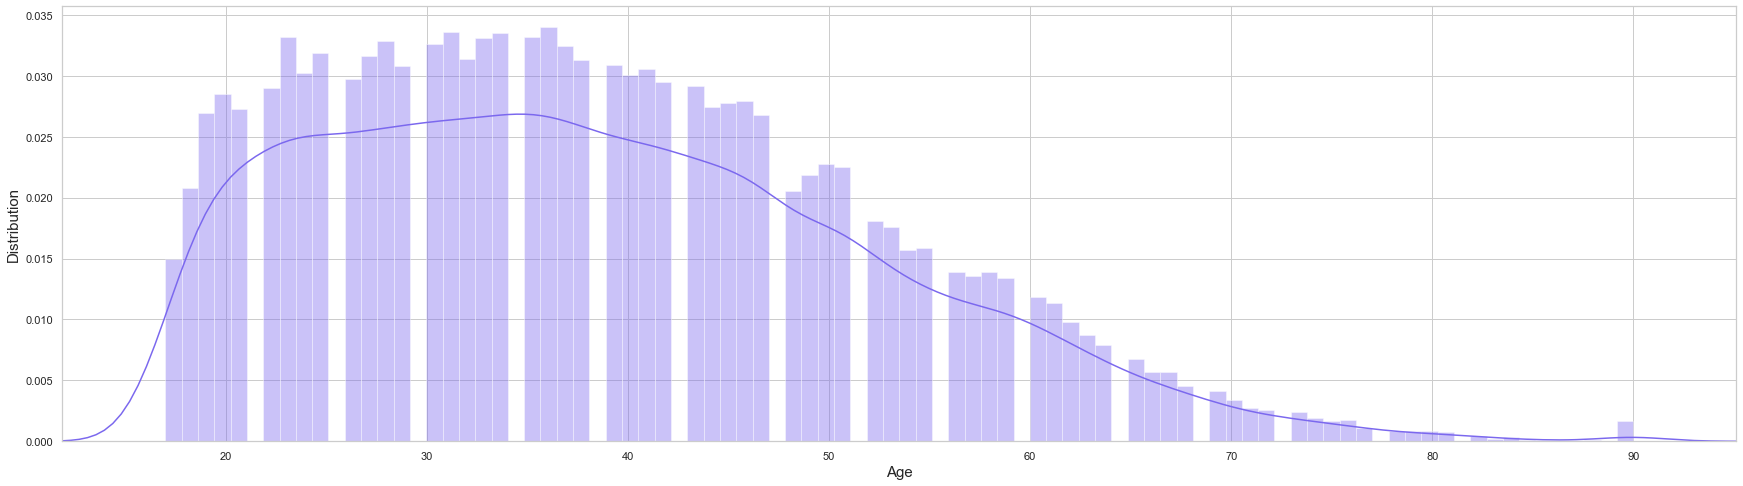

In [26]:
plt.rcParams['figure.figsize'] = [30, 8]
sns.set(style = 'whitegrid')

sns.distplot(df['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

In [27]:
#From the age distribution, we can see the youngest user is 17years the oldest is 90years. 

In [28]:
#Standardization is applied to handle the outliers. 
scaler = StandardScaler()
list_scaling = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
df[list_scaling] = scaler.fit_transform(df[list_scaling])

In [29]:
#creating binary column for income as >50K = 1, other 0.
for i in range(len(df)):
    if df['income'][i] == ' >50K':
        df['income'][i] = 1
    else:
        df['income'][i] = 0
df["income"] = df["income"].astype(int)

<ipython-input-29-d01c0b8c468e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][i] = 0
<ipython-input-29-d01c0b8c468e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'][i] = 1


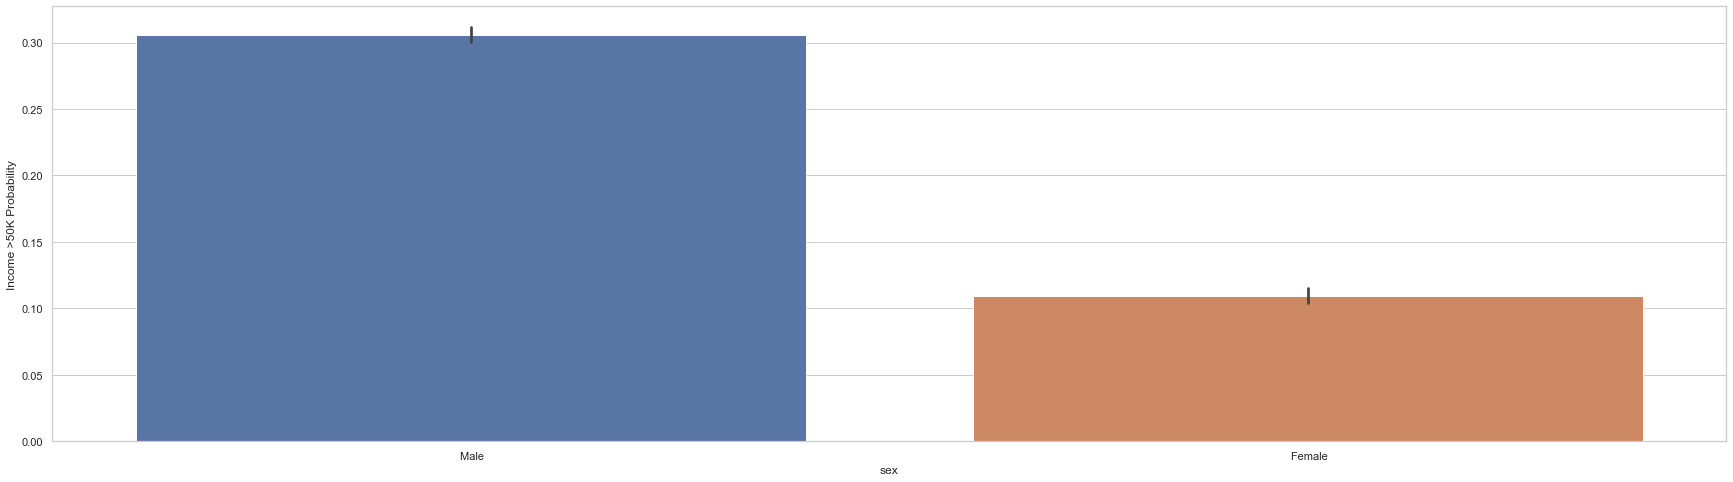

In [30]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=df)
g = g.set_ylabel("Income >50K Probability")

In [31]:
"""

    Male has more probability than Female to earn “>50K” income.

"""

'\n\n    Male has more probability than Female to earn “>50K” income.\n\n'

In [32]:
# All the categorical data is encoded using LabelEncoder. 
le = preprocessing.LabelEncoder()
workclass_cat = le.fit_transform(df.workclass)
education_cat = le.fit_transform(df.education)
marital_cat   = le.fit_transform(df.marital_status)
occupation_cat = le.fit_transform(df.occupation)
relationship_cat = le.fit_transform(df.relationship)
race_cat = le.fit_transform(df.race)
sex_cat = le.fit_transform(df.sex)
native_country_cat = le.fit_transform(df.native_country)

df['workclass_cat'] = workclass_cat
df['education_cat'] = education_cat
df['marital_cat'] = marital_cat
df['occupation_cat'] = occupation_cat
df['relationship_cat'] = relationship_cat
df['race_cat'] = race_cat
df['sex_cat'] = sex_cat
df['native_country_cat'] = native_country_cat

#removing old columns
old_cols = ['workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']
df = df.drop(old_cols, axis = 1)

In [33]:
# Co relation visualization
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039,0.003786,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,-0.001151
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481,-0.016587,-0.028156,0.028184,0.001554,0.008922,-0.021278,0.026882,-0.051957
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182,0.052015,0.359172,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.050831
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333,0.033828,0.030047,-0.043398,0.025511,-0.057918,0.011143,0.048477,-0.001984
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523,0.012231,0.016744,-0.034182,0.017979,-0.061064,0.018902,0.045572,0.000420
hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690,0.138974,0.055510,-0.190521,0.080384,-0.248975,0.041910,0.229312,-0.002671
income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000,0.051645,0.079311,-0.199295,0.075448,-0.250924,0.071853,0.215995,0.015845
workclass_cat,0.003786,-0.016587,0.052015,0.033828,0.012231,0.138974,0.051645,1.000000,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,-0.007710
education_cat,-0.010508,-0.028156,0.359172,0.030047,0.016744,0.055510,0.079311,0.023537,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.064291
marital_cat,-0.266292,0.028184,-0.069338,-0.043398,-0.034182,-0.190521,-0.199295,-0.064798,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.023827


<AxesSubplot:>

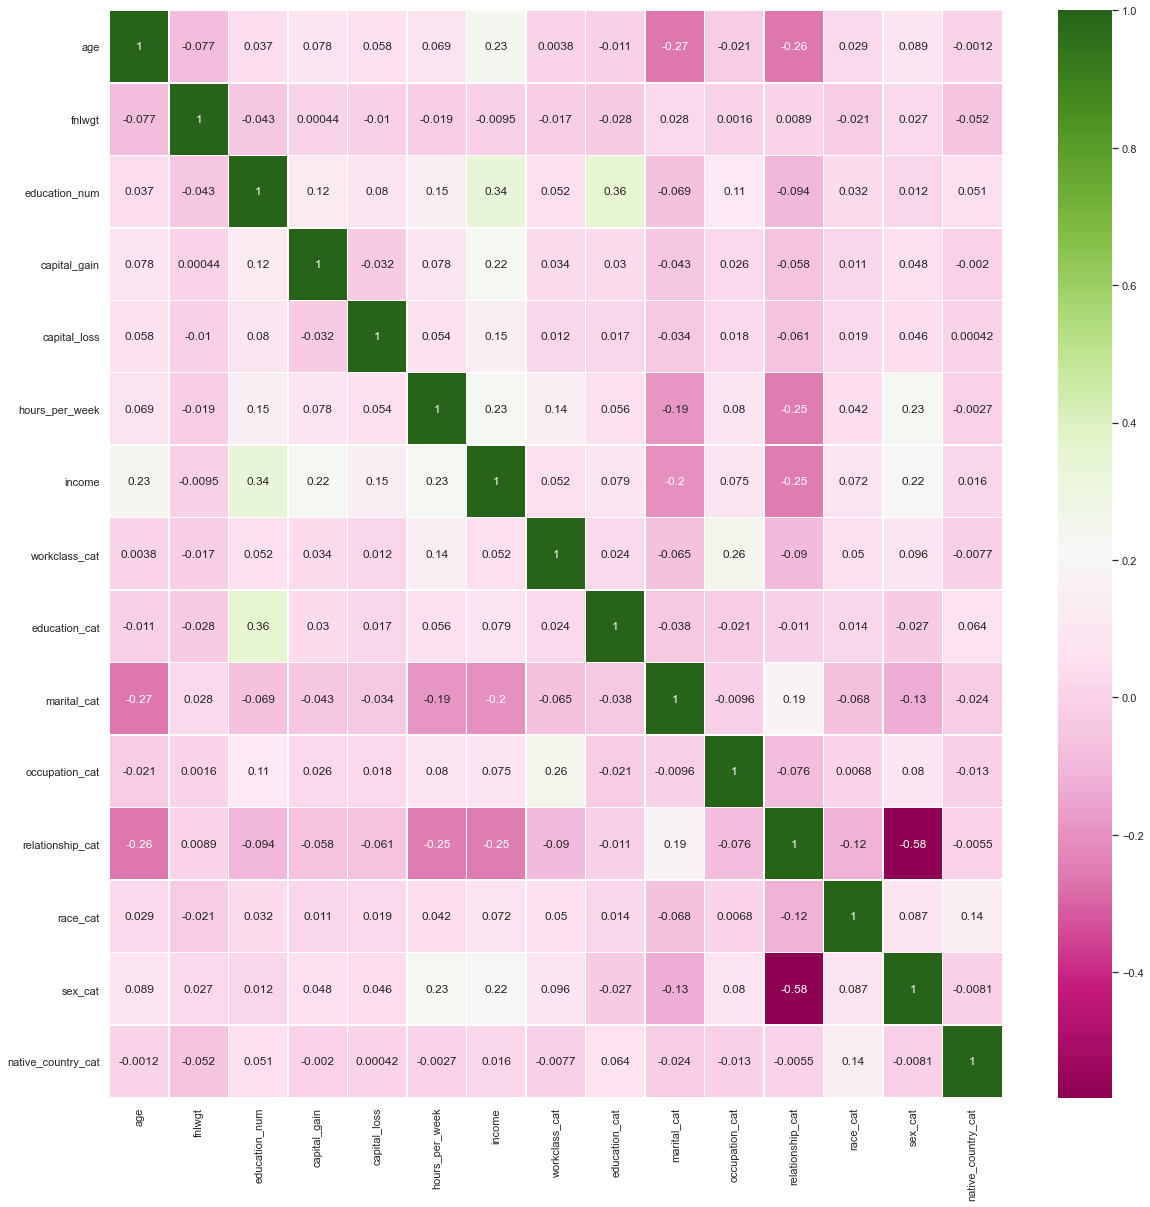

In [34]:
# Co relation visualization
fig, ax = plt.subplots(figsize=(20,20))     
sns.heatmap(df.corr(), annot=True, cmap="PiYG", linewidths=.5)

In [35]:
"""

    Create training and testing data set by 70% as training and 30% as testing
    income removed and treated as class label
    
"""
X = df.drop(columns=['income'])
y = df.income
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

<AxesSubplot:xlabel='depth', ylabel='Accuracy'>

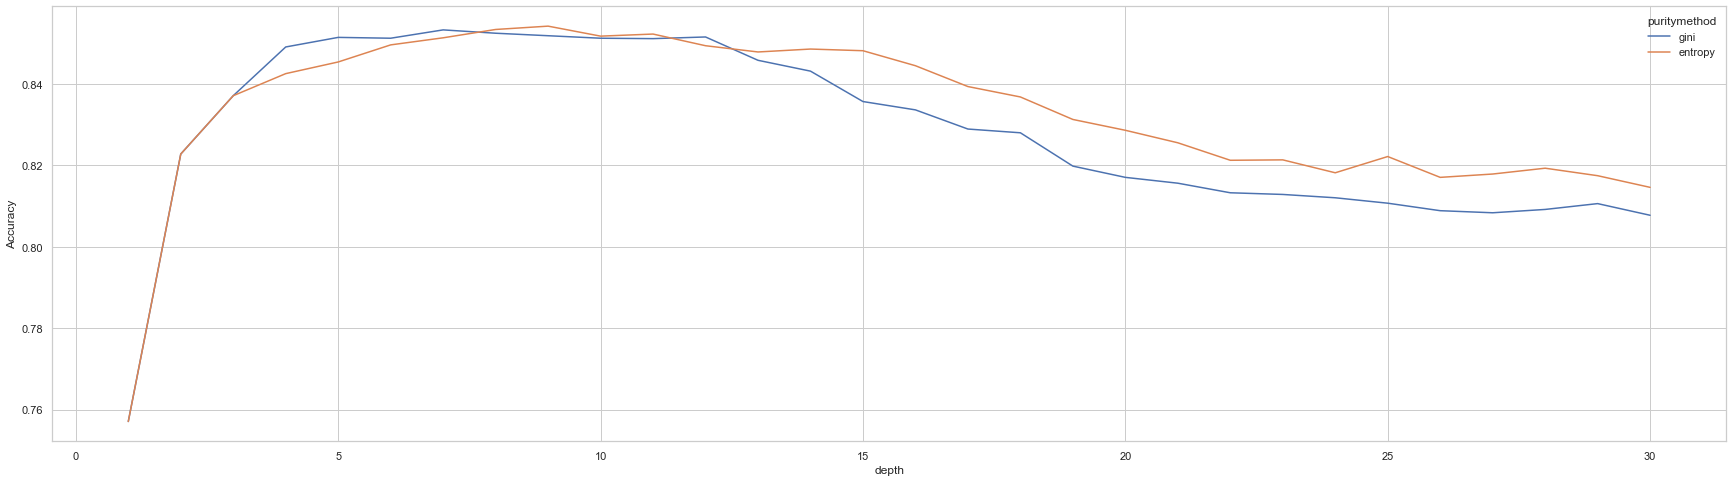

In [36]:
"""
    Decission Tree with parameter tunning
    The gini and entropy used to mesure the quality of split
    The decission tree mesured in the range of 1 - 31 depth range

"""

ind = 1
crit = ['gini', 'entropy']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'Accuracy'])

for i in np.arange(1, 31):
  for j in crit:
    model = DecisionTreeClassifier(max_depth=i, criterion=j)
    model.fit(X_train, y_train)
    pred = model.predict (X_test)
    df_results.loc[ind] = [i, j, accuracy_score(y_test, pred)]
    ind+=1
sns.lineplot(x = 'depth', y = 'Accuracy', hue='puritymethod', data = df_results)

In [37]:
# Get the best performing model with model attribute   
print(tabulate(df_results[df_results['Accuracy']==df_results['Accuracy'].max()], headers = 'keys', tablefmt = 'psql'))

+----+---------+----------------+------------+
|    |   depth | puritymethod   |   Accuracy |
|----+---------+----------------+------------|
| 18 |       9 | entropy        |   0.854218 |
+----+---------+----------------+------------+


In [38]:
# KNN with parameter tuning
"""
    The number neighbours used in the range 1 - 21
    The metrics are used euclidean, manhattan, minkowski
    The weight used uniform, distance 

"""
knn_model = neighbors.KNeighborsClassifier()
print(knn_model.get_params())

# Distance and Weight Array
n = np.arange(1,21)
dist = np.array(['euclidean', 'manhattan', 'minkowski'])
weight = np.array(['uniform', 'distance'])

#Finding Best Performing Parameters
results = pd.DataFrame(columns = ['#neighbors','distance', 'weight', 'acc_score'])
index = 0
for i in n:
  for j in dist:
    for k in weight:
      knn_model = neighbors.KNeighborsClassifier(n_neighbors=i, metric=j, weights=k)
      knn_model.fit(X_train, y_train)
      pred = knn_model.predict(X_test)
      acc_score = accuracy_score(y_test, pred)
      #rmse = mean_squared_error(y_test, pred, squared=False)
      results.loc[index] = [i,j,k,acc_score]
      index +=1
# print('All result with model')
# print(tabulate(results, headers = 'keys', tablefmt = 'psql'))


# Get the best performing model with model attribute     
print(tabulate(results[results['acc_score']==results['acc_score'].max()], headers = 'keys', tablefmt = 'psql'))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+-----+--------------+------------+----------+-------------+
|     |   #neighbors | distance   | weight   |   acc_score |
|-----+--------------+------------+----------+-------------|
| 110 |           19 | manhattan  | uniform  |    0.838145 |
+-----+--------------+------------+----------+-------------+


In [39]:
'''

    Function to get the time taken to train the model and predict the model 
    The input parameters are 
        - learner: The algorithm wich is used to train and predict
        - sample_size: the number of samples to be used to train the data
        - X_train: Training data set
        - y_train: The class or fatures label training
        - X_test: Testing data set
        - y_test: The class or features label for testing
    
'''

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    # Fit the algorithm to the training data using slicing with 'sample_size' 
    #Timer start
    start = time() 
    learner =  learner.fit(X_train[:sample_size], y_train[:sample_size])
    #Timer end here
    end = time()
    
    # The Training time end - start
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # Timer start
    start = time()
    predictions_test = learner.predict(X_test)
    # Timer end here
    end = time()
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
        
    # Calculate accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
        
    # Calculate F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, average = 'binary', beta = 0.5)
       
    # Successfully calcualted
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Results will be return here
    return results

In [40]:
# Create the decision tree and KNN for evaluate the accuracy, time and F1 score recpect to the 1%, 10% and 100% of date set
decisitionTree = DecisionTreeClassifier(max_depth=9, criterion='entropy')
KNN = neighbors.KNeighborsClassifier(n_neighbors=19, metric='manhattan', weights='distance')


# Create the sample of 1%, 10%, and 100%
samples_1 = int(len(X_train) / 100)
samples_10 = int(len(X_train) / 10)
samples_100 = int(len(X_train))

# Collect the result for each algorithm with the different range of data sets
results = {}
for clf in [decisitionTree, KNN]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10 ,samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 227 samples.
DecisionTreeClassifier trained on 2279 samples.
DecisionTreeClassifier trained on 22792 samples.
KNeighborsClassifier trained on 227 samples.
KNeighborsClassifier trained on 2279 samples.
KNeighborsClassifier trained on 22792 samples.


In [41]:
# Quick view on performance Of KNN and decision tree
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.003041,0.008745,0.068554
pred_time,0.002556,0.002757,0.002536
acc_test,0.787367,0.834767,0.854115
f_test,0.570475,0.670511,0.723662


KNeighborsClassifier


,1%,10%,100%
train_time,0.002679,0.006313,0.402889
pred_time,0.090788,0.394845,3.190819
acc_test,0.803133,0.814803,0.836814
f_test,0.584874,0.616865,0.670522


Naive Predictor: [Accuracy score: 0.2399, F-score: 0.2829]


<ipython-input-50-f19568f6a9f6>:69: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
<ipython-input-50-f19568f6a9f6>:70: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


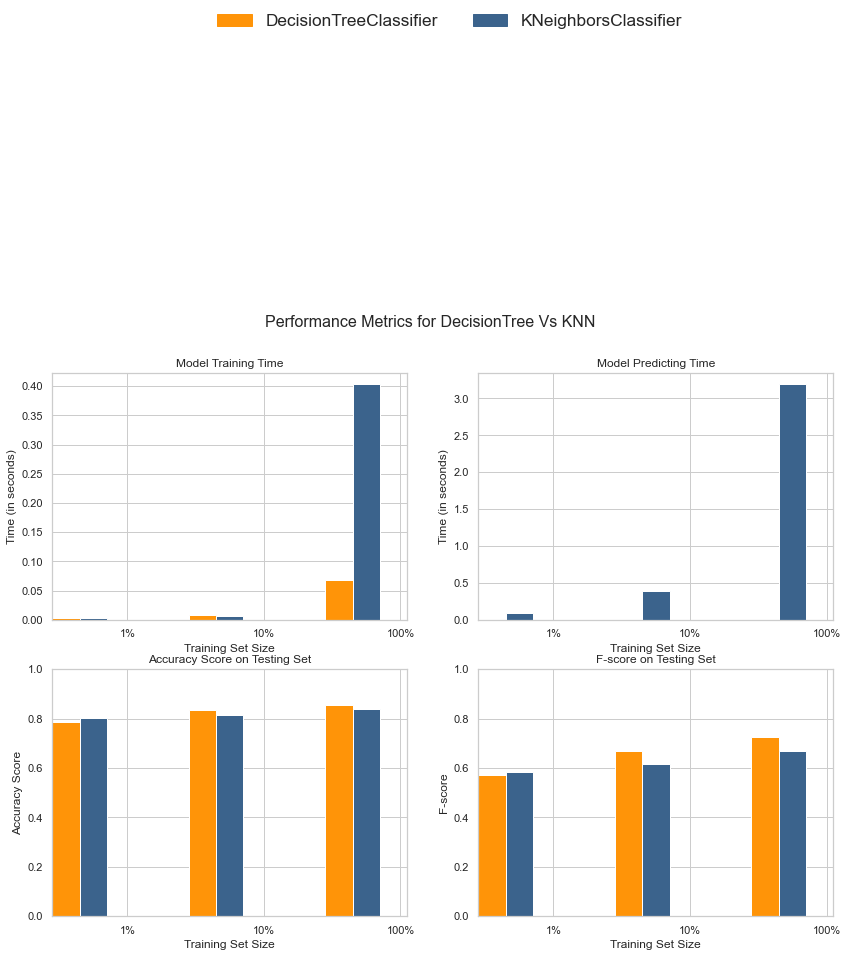

In [50]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

# Calculate accuracy, precision and recall
accuracy = np.sum(y_train)/ y_train.count()
recall = np.sum(y_train) / np.sum(y_train)
precision = np.sum(y_train) / y_train.count()

# Calculate F-score using beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5*0.5)* precision* recall/ (0.5*0.5*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


# Run metrics visualization for the three supervised learning models chosen

# Create figure
fig, ax = plt.subplots(2, 2, figsize = (14,10))

# Constants
bar_width = 0.2
colors =  ['#ff9408', '#3b638c', '#fe46a5', '#90b134']

# Super loop to plot four panels of data
results.keys()
for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['train_time','pred_time', 'acc_test', 'f_test']):
        for i in np.arange(3):
                
            # Creative plot code
            ax[j//2, j%2].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
            ax[j//2, j%2].set_xticks([0.45, 1.45, 2.45])
            ax[j//2, j%2].set_xticklabels(["1%", "10%", "100%"])
            ax[j//2, j%2].set_xlabel("Training Set Size")
            ax[j//2, j%2].set_xlim((-0.1, 2.5))
    
# Add y-labels
ax[0, 0].set_ylabel("Time (in seconds)")
ax[0, 1].set_ylabel("Time (in seconds)" )
ax[1, 0].set_ylabel("Accuracy Score")
ax[1, 1].set_ylabel("F-score")
    
# Add titles
ax[0, 0].set_title("Model Training Time")
ax[0, 1].set_title("Model Predicting Time")
ax[1, 0].set_title("Accuracy Score on Testing Set")
ax[1, 1].set_title("F-score on Testing Set")
    
# Set y-limits for score panels
ax[1, 0].set_ylim((0, 1))
ax[1, 1].set_ylim((0, 1))

# Create patches for the legend
patches = []
for i, learner in enumerate(results.keys()):
    patches.append(mpatches.Patch(color = colors[i], label = learner))
plt.legend(handles = patches, bbox_to_anchor = (-0.08, 3.68), \
            loc = 'upper center', borderaxespad = 0., ncol = 2, fontsize = 'x-large')
    
# Aesthetics
plt.suptitle("Performance Metrics for DecisionTree Vs KNN", fontsize = 16, y = 0.96)

fig.tight_layout()
fig.show()